Text(0, 0.5, 'Amount of Licenses Registered')

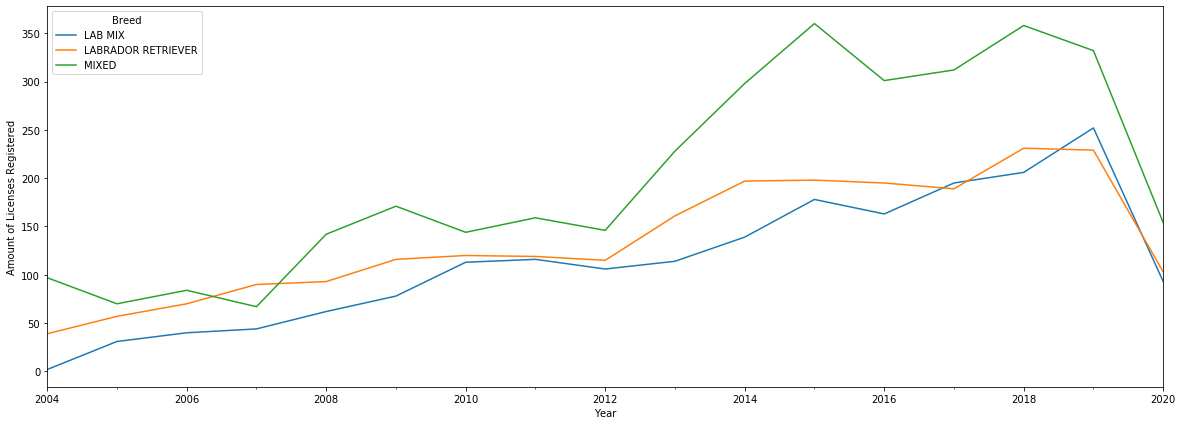

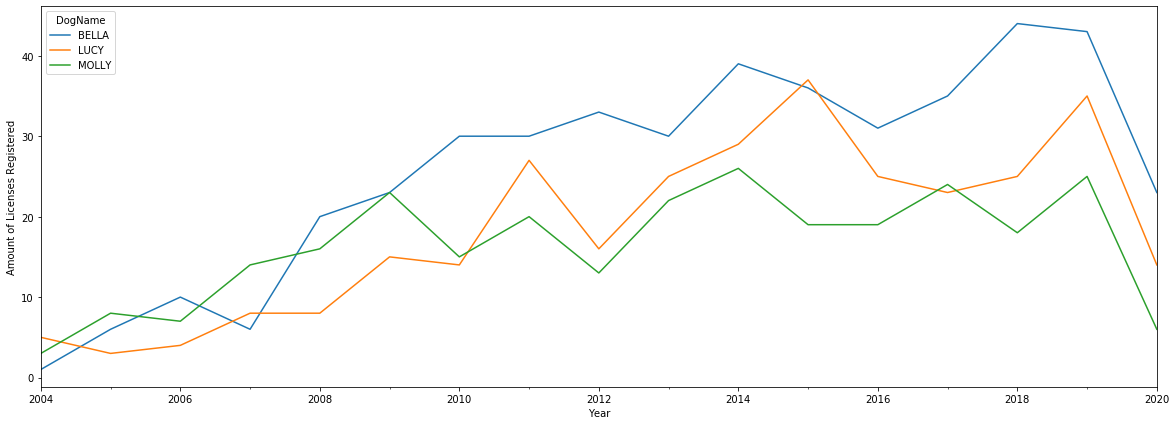

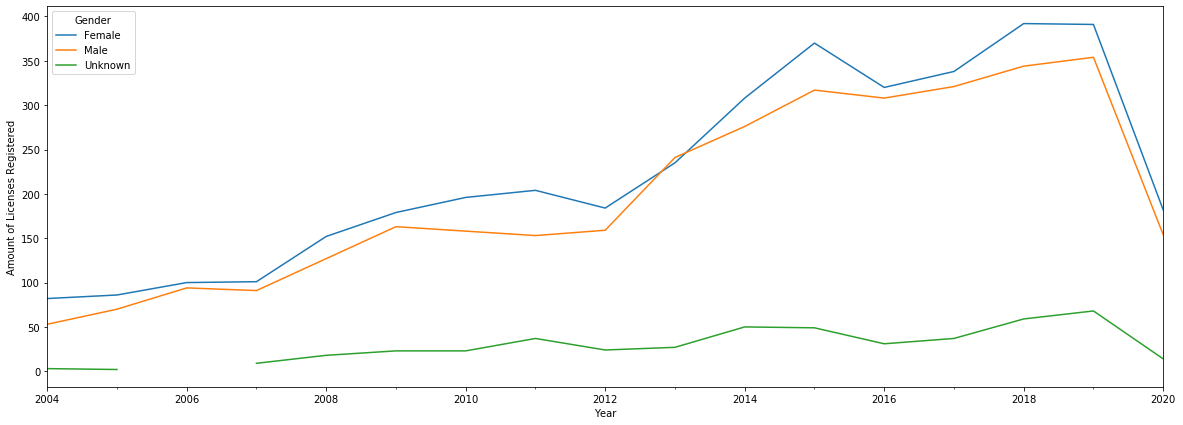

In [20]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('./AlleghenyCountyDogLicenses.csv')


# search for missing values 
columns = list(df)

#iterate through columns, return amount of null values

def checkForNulls():
    for c in columns:
        if df[c].isnull().sum() > 0:
            print ('There are null values present') 
            
#drop null values            
df = df.dropna()

checkForNulls()

#make sure Python knows ValidDate is date format
df.index = pd.to_datetime(df['ValidDate'],infer_datetime_format=True)

#add Gender series

df['Gender'] = "-"

#find gender in LicenseType and put in the Gender Column

def findGender(str):
    if "Male" in str:
        return 'Male'
    elif "Female" in str:
        return 'Female'
    else:
        return 'Unknown'
        
df['Gender'] = df['LicenseType'].apply(findGender)

#make ReproductiveStatus Series, find neuter status

df['ReproductiveStatus'] = "-"

def findNeuterStatus(str):
    if "Neutered" in str:
        return "Neutered"
    
    elif "Spayed" in str:
        return "Neutered"
    
    else: 
        return "Not Neutered"
    
df['ReproductiveStatus'] = df['LicenseType'].apply(findNeuterStatus)

#Remove ExpYear

del df['ExpYear']





#return top n amount for given series

def getTopAmount(series, top_amount):
   
    top_list = df[series].value_counts()[:top_amount].index.tolist()
    return top_list


#make a df for top 3 Breeds over time
dfplot = df.loc[df['Breed'].isin(getTopAmount('Breed',3))]

#plot the df
plot = dfplot.groupby([pd.Grouper(freq='Y'),'Breed']).size().unstack().plot(figsize=(20,7))
plot.set_xlabel("Year")
plot.set_ylabel("Amount of Licenses Registered")

#make a df for top 3 DogNames over time
dfplot2 = df.loc[df['DogName'].isin(getTopAmount('DogName',3))]

#plot the df
plot2 = dfplot2.groupby([pd.Grouper(freq='Y'),'DogName']).size().unstack().plot(figsize=(20,7))
plot2.set_xlabel("Year")
plot2.set_ylabel("Amount of Licenses Registered")

#make a df to see Gender trends over time

dfplot3 = df.loc[df['Breed'].isin(getTopAmount('Gender',1))]

#plot the df
plot3 = dfplot.groupby([pd.Grouper(freq='Y'),'Gender']).size().unstack().plot(figsize=(20,7))
plot3.set_xlabel("Year")
plot3.set_ylabel("Amount of Licenses Registered")

<function __main__.checkForNulls()>